In [36]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [20]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head(6)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X_train = torch.tensor(train_df.iloc[:, 1:].values, dtype=torch.float)
y_train = torch.tensor(train_df.label.values, dtype=torch.long)

X_test = torch.tensor(test_df.values, dtype=torch.float)

In [22]:
# classification based on ANN
class Neural_Network(nn.Module):
    def __init__(self):
        super(Neural_Network, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 200)
        self.fc3 = nn.Linear(200, 10)
    
    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return nn.functional.sigmoid(x)

In [23]:
net = Neural_Network()
print(net)

Neural_Network(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)


In [24]:
learning_rate=1e-3
epochs = 10

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)


train = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train, batch_size=10)
test_loader = torch.utils.data.DataLoader(X_test)

for i in range(epochs):
    for batch_ind, (inputs, target) in enumerate(train_loader):
        inputs = inputs.view(-1, 28 * 28)
        optimizer.zero_grad()
        output = net(inputs)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print(f"Epoch: {i+1}| Loss: {loss}")

Epoch: 1| Loss: 1.4699116945266724
Epoch: 2| Loss: 1.4640839099884033
Epoch: 3| Loss: 1.4620327949523926
Epoch: 4| Loss: 1.4616022109985352
Epoch: 5| Loss: 1.4614534378051758
Epoch: 6| Loss: 1.4616167545318604
Epoch: 7| Loss: 1.4618562459945679
Epoch: 8| Loss: 1.4616490602493286
Epoch: 9| Loss: 1.4615198373794556
Epoch: 10| Loss: 1.4614951610565186


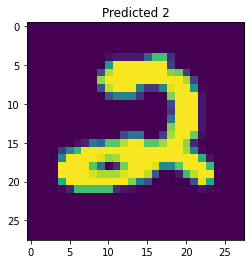

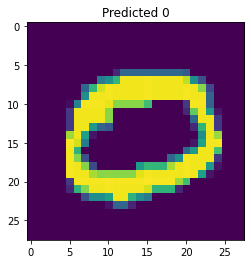

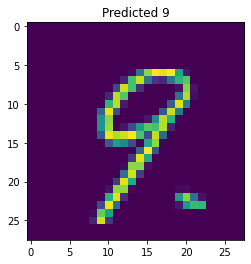

In [25]:
results = np.zeros(len(test_df), dtype=int)
for ind, inputs in enumerate(test_loader):
    inputs = inputs.view(-1, 28 * 28)
    results[ind] = torch.argmax(net(inputs)).item()

# testing 3 first images
for i in range(3):
    test_img = test_df.iloc[i].values.reshape(28, 28)
    plt.imshow(test_img)
    plt.title(f"Predicted {results[i]}")
    plt.show()

In [26]:
sub1 = {'ImageId': np.arange(1, len(test_df) + 1), 'Label': results}
res1_df = pd.DataFrame(data=sub1)
res1_df.to_csv('submission1.csv', index=False)

Below I build a Convolutional Neural Network for classification

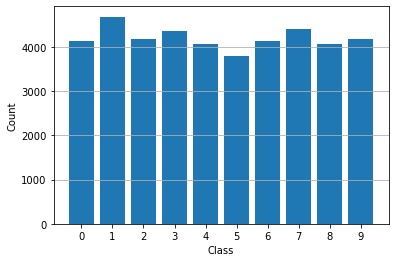

In [27]:
plt.bar(train_df.label.value_counts().index, train_df.label.value_counts())
plt.xticks(np.arange(10))
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid('on', axis='y')

In [28]:
X_train_cnn = torch.tensor(train_df.iloc[:, 1:].values.reshape(-1, 1, 28, 28), dtype=torch.float)
y_train_cnn = torch.tensor(train_df.label.values, dtype=torch.long)
X_test_cnn = torch.tensor(test_df.values.reshape(-1, 1, 28, 28), dtype=torch.float)

batch_size = 100

train_cnn = torch.utils.data.TensorDataset(X_train_cnn, y_train_cnn)
train_loader_cnn = torch.utils.data.DataLoader(train_cnn, batch_size=batch_size)
test_loader_cnn = torch.utils.data.DataLoader(X_test_cnn)

In [29]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 5)
        self.pool = nn.MaxPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 4 * 4, 100)
        self.fc2 = nn.Linear(100, 80)
        self.fc3 = nn.Linear(80, 10)
        
    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [30]:
cnn = CNN()
cnn

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=10, bias=True)
)

In [32]:
learning_rate_cnn = 1e-3
epochs_cnn = 25

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn.parameters(), lr=learning_rate_cnn)

loss_all = []
print("Training CNN...")
for epoch in range(epochs_cnn):
    for i, data in enumerate(train_loader_cnn):
        inputs, label = data
        optimizer.zero_grad()
        output = cnn(inputs)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
    print(f"Epoch: {epoch+1}| Loss: {loss}")
    loss_all.append(loss)

Training CNN...
Epoch: 1| Loss: 0.1998763233423233
Epoch: 2| Loss: 0.13945390284061432
Epoch: 3| Loss: 0.10663144290447235
Epoch: 4| Loss: 0.08455228060483932
Epoch: 5| Loss: 0.06542393565177917
Epoch: 6| Loss: 0.0512513741850853
Epoch: 7| Loss: 0.041754622012376785
Epoch: 8| Loss: 0.03379674255847931
Epoch: 9| Loss: 0.02920079417526722
Epoch: 10| Loss: 0.025577910244464874
Epoch: 11| Loss: 0.021601371467113495
Epoch: 12| Loss: 0.018566109240055084
Epoch: 13| Loss: 0.015430361963808537
Epoch: 14| Loss: 0.013565941713750362
Epoch: 15| Loss: 0.012089265510439873
Epoch: 16| Loss: 0.011281568557024002
Epoch: 17| Loss: 0.010754933580756187
Epoch: 18| Loss: 0.00985642895102501
Epoch: 19| Loss: 0.009217892773449421
Epoch: 20| Loss: 0.007866813801229
Epoch: 21| Loss: 0.007402157876640558
Epoch: 22| Loss: 0.0065504414960742
Epoch: 23| Loss: 0.0062333582900464535
Epoch: 24| Loss: 0.0060452986508607864
Epoch: 25| Loss: 0.0062334914691746235


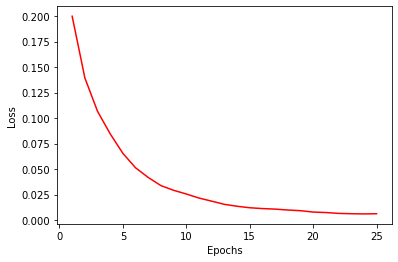

In [33]:
plt.plot(np.arange(1, epochs_cnn+1), loss_all, color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

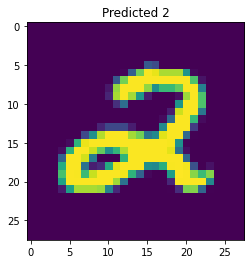

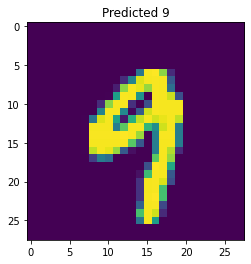

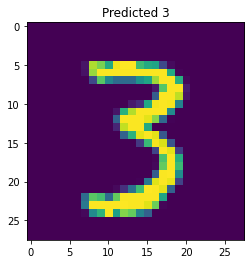

In [34]:
results_cnn = np.zeros(len(test_df), dtype=int)

for i, inputs in enumerate(test_loader_cnn):
    _, pred = torch.max(cnn(inputs), 1)
    results_cnn[i] = pred

# testing 3 last images
for i in range(1, 4):
    test_cnn_img = test_df.iloc[-i].values.reshape(28, 28)
    plt.imshow(test_cnn_img)
    plt.title(f"Predicted {results_cnn[-i]}")
    plt.show()

In [35]:
# submission
sub2 = {'ImageId': np.arange(1, len(test_df) + 1), 'Label': results_cnn}
res2_df = pd.DataFrame(data=sub2)
res2_df.to_csv('submission2.csv', index=False)